In [1]:
%pylab inline
import numpy as np
from scipy import *

Populating the interactive namespace from numpy and matplotlib


## Solving a system of linear equations

## Finding a line passing through 2 points

We are given two points in $R^2$: $[-1,2]$ and $[1,1]$, and we want to find the line passing through these points.

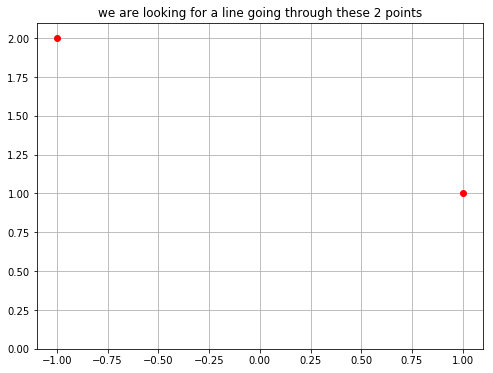

In [2]:

figure(figsize=[8,6])
p=np.array([[-1,2],[1,1]])
plot(p[:,0],p[:,1],'ro')
xlim([-1.1,1.1])
ylim([0,2.1])
grid()
title('we are looking for a line going through these 2 points');

Any line (other than vertical) can be expressed as $y=w_0+w_1x$ where $[x,y]$ are points along the line $w_0$ y-axis intercept and $w_1$ is the slope.

To identify the line that passes through the two points we need to find $w_0,w_1$ that satisfy two constraints:

* The point $[x,y]=[-1,2]$ implies the constraint $w_0-w_1=2$
* The point $[x,y]=[1,1]$ implies the constraint $w_0+w_1=1$

### Writing equations in matrix form
There are many ways to solve the equations, i.e. find $w_x,w_y$ that satisfy both constraints. 

Here we show two ways to find the solution using `numpy`

We can write the two equations in matrix form as follows:
$$
\begin{equation}
\begin{bmatrix} 1 & -1 \\
	   1 & 1	
\end{bmatrix}
\begin{bmatrix} w_0 \\ w_1	
\end{bmatrix}
=
\begin{bmatrix} 2 \\ 1	
\end{bmatrix}
\end{equation}
$$
Which we can write succinctly as ${\bf A w = b}$

* The coefficients matrix ${\bf A} = \begin{equation}
\begin{bmatrix} 1 & -1 \\
	   1 & 1	
\end{bmatrix}
\end{equation} $
* The *ordinate* or *dependent variable* vector: ${\bf b}=\begin{bmatrix} 2 \\ 1	\end{bmatrix}$
* The parameter vector ${\bf w} = \begin{bmatrix} w_0 \\ w_1	\end{bmatrix}$

**Goal:** Find ${\bf w}$ such that  ${\bf A w = b}$

As ${\bf A}$ is invertible we can multiply both sides by ${\bf A^{-1}}$ and get:

${\bf w =  A^{-1} A w = A^{-1} b }$


### Solving using `numpy`

In [3]:
A = np.array([[1,-1], [1,1]])
print ('A =\n',A)
b = np.array([[2],[1]])
print ('b =\n',b)

A =
 [[ 1 -1]
 [ 1  1]]
b =
 [[2]
 [1]]


In [4]:
from numpy.linalg import inv
print ("find the solution using inv(A)")
Ainv=inv(A)
print ('inv(A) = \n',Ainv)
print ('check the Ainv is indeed the inverse of A')
print ('A * inv(A)=\n',A.dot(Ainv))
w=inv(A).dot(b)
print ('Solution: w= inv(A)*b = \n',w)

find the solution using inv(A)
inv(A) = 
 [[ 0.5  0.5]
 [-0.5  0.5]]
check the Ainv is indeed the inverse of A
A * inv(A)=
 [[ 1.  0.]
 [ 0.  1.]]
Solution: w= inv(A)*b = 
 [[ 1.5]
 [-0.5]]


In [5]:
print ("alternatively, you can use 'solve()'")
from numpy.linalg import solve
w = solve(A, b)
print ('solution: w =\n',w)

alternatively, you can use 'solve()'
solution: w =
 [[ 1.5]
 [-0.5]]


In [6]:
def F(x,w):
    return w[0]+w[1]*x
print ('F(-1)=',F(-1,w))
print ('F(1)=',F(1,w)    )

F(-1)= [ 2.]
F(1)= [ 1.]


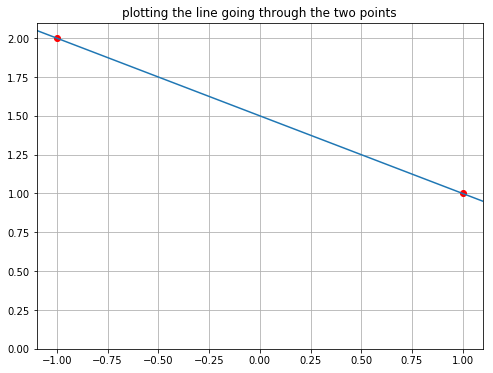

In [7]:
figure(figsize=[8,6])
plot(p[:,0],p[:,1],'ro')
_xlim=[-1.1,1.1]
xlim(_xlim)
ylim([0,2.1])
plot(_xlim,[F(_xlim[0],w),F(_xlim[1],w)])
grid()
title('plotting the line going through the two points');


## More than 2 points

Suppose we have three points, rather than two.

There is usually no straight line going through these points.

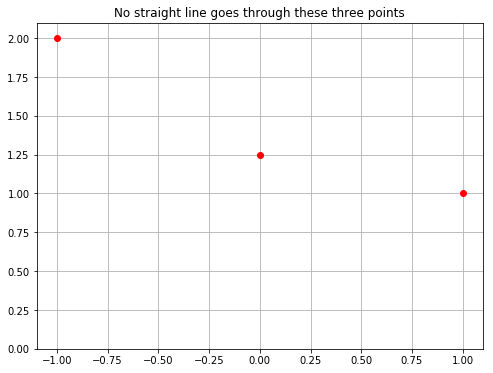

In [8]:
figure(figsize=[8,6])
p=np.array([[-1,2],[1,1],[0,1.25]])
plot(p[:,0],p[:,1],'ro')
xlim([-1.1,1.1])
ylim([0,2.1])
grid()
title('No straight line goes through these three points');

### When can you use `numpy.linlag.solve` ?
The function `numpy.linlag.solve` can be used to solve a set of $n$ linear equations with $n$ unknowns.

You simply express the set of equation in a matrix format ${\bf Ax=b}$ and call `solve` using `x=solve(A,b)` the returned value is a vector with the solution for ${\bf x}$.

However the number of equations and the number of unknowns must be equal. 
* If the number of equations is **smaller** that the number of unknowns we say that the system is **underdetermined** or **singular**. It means that we don't have enough information to specify a unique solution. In data analysis this would rarely be the case.
* If the number of equations is **larger** than the number of unknowns we say that the system if **overdetermined**. It means that there is no solution that satisfies all of the constraints. In data analysis this is a very common occurance.

### Example
Find the solution for the following set of 3 equations:
$$
x+y-z=5 \\
z+2y=3 \\
y-x=4
$$

In [9]:
# Solution
A=np.array([[1,1,-1],[0,2,1],[-1,1,0]])
b=np.array([5,3,4])
solve(A,b)

array([-1.,  3., -3.])

Which means that the solution is $x=-1,y=3,z=-3$

Check that the solution is correct, i.e. that it satisfies the three constraints.